# Определение перспективного тарифа для телеком-компании

Исследование данных для компании "Мегалайн". Клиентам предлагается на выбор тарифы "Смарт" и "Ультра". Чтобы скорректировать рекламный план нужно провести анализ имеющихся данных и выяснить, какой тариф наиболее прибыльный.

В нашем распоряжени небольшая выборка из 500 клиентов со следующими данными: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год, сколько интернет трафика израсходовал.

**Цель работы:** проанализировать поведение клиентов и выяснить, какой тариф наиболее прибыльный.

Так как данных очень много, перед тем как приступить к анализу, проведем обзор данных и, возможно, потребуется их предобработка, чтобы датасет стал более удобным и пригодным к проведению исследования.

Таким образом исследование пройдет в 4 этапа:
* Обзор данных
* Предобработка данных
* Анализ поведения клиентов
* Проверка гипотез

## Открытие файлов с данными

Импорт необходимых для проведения исследования библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

Чтение данных из файлов

In [2]:
data_calls = pd.read_csv('datasets/calls.csv')
data_internet = pd.read_csv('datasets/internet.csv')
data_messages = pd.read_csv('datasets/messages.csv')
data_tariffs = pd.read_csv('datasets/tariffs.csv')
data_users = pd.read_csv('datasets/users.csv')

Посмотрим общую информацию по данным:

In [3]:
print('-' * 10, 'Calls', '-' * 10)
display(data_calls.info())
display(data_calls.head())
print('\n\n\n')
print('-' * 10, 'Interner', '-' * 10)
display(data_internet.info())
display(data_internet.head())
print('\n\n\n')
print('-' * 10, 'Messages', '-' * 10)
display(data_messages.info())
display(data_messages.head())
print('\n\n\n')
print('-' * 10, 'Tariffs', '-' * 10)
display(data_tariffs.info())
display(data_tariffs.head())
print('\n\n\n')
print('-' * 10, 'Users', '-' * 10)
display(data_users.info())
display(data_users.head())
print('\n\n\n')

---------- Calls ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000






---------- Interner ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000






---------- Messages ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000






---------- Tariffs ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra






---------- Users ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Предобработка данных

In [4]:
data_users = data_users.rename(columns={'tariff' : 'tariff_name'})

### Проверка типов данных

In [5]:
print('-' * 45, 'Calls', '-' * 45)
print(data_calls.dtypes)
display(data_calls.head())
print('\n\n')
print('-' * 45, 'Messages', '-' * 45)
print(data_messages.dtypes)
display(data_messages.head())
print('\n\n')
print('-' * 45, 'Internet', '-' * 45)
print(data_internet.dtypes)
display(data_internet.head())
print('\n\n')
print('-' * 45, 'Users', '-' * 45)
print(data_users.dtypes)
display(data_users.head())
print('\n\n')
print('-' * 45, 'Tariffs', '-' * 45)
print(data_tariffs.dtypes)
display(data_tariffs.head())

--------------------------------------------- Calls ---------------------------------------------
id            object
call_date     object
duration     float64
user_id        int64
dtype: object


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000





--------------------------------------------- Messages ---------------------------------------------
id              object
message_date    object
user_id          int64
dtype: object


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000





--------------------------------------------- Internet ---------------------------------------------
Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000





--------------------------------------------- Users ---------------------------------------------
user_id         int64
age             int64
churn_date     object
city           object
first_name     object
last_name      object
reg_date       object
tariff_name    object
dtype: object


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra





--------------------------------------------- Tariffs ---------------------------------------------
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для колонок, хранящих дату применим метод to_datetime(), чтобы преобразовать их к типу **datetime**.

In [6]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])
data_users['reg_date'] = pd.to_datetime(data_users['churn_date'])

Преобразование верному типу данных произведено успешно

Избавимся от бессмысленного столбца в датасете `data_users_internet`:

In [7]:
data_internet =  data_internet.drop(columns=['Unnamed: 0'])

In [8]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Во всех датасетах в столбце **id**, который подразумевается числовым, записаны строковые значения в виде: (id пользователя)_(номер/id действия). Такая запись не несет для нас никакой пользы, изменим этот формат записи, оставив только часть с номером/id. Мы уже храним в этой же строке id пользователя, выполнившего действие, поэтому дважды нам записывать эту информацию не нужно и мы ничего не потеряем, выполнив такое действие

In [9]:
def id_to_int(row):
    if '_' in str(row['id']):
        s1 = str(row['id']).replace('_', '')
        return int(row['id'])

In [10]:
data_calls['id'] = data_calls.apply(id_to_int, axis=1)
data_messages['id'] = data_messages.apply(id_to_int, axis=1)
data_internet['id'] = data_internet.apply(id_to_int, axis=1)

In [11]:
data_calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000


Столбец **id** исправили, перейдем к следующему пункту предобработки данных

### Поиск и исправление аномалий в данных

Изучим столбцы наших датафреймов с помощью метода describe()

In [12]:
print('-' * 45, 'Calls', '-' * 45)
display(data_calls.describe())
print('\n\n')
print('-' * 45, 'Messages', '-' * 45)
display(data_messages.describe())
print('\n\n')
print('-' * 45, 'Internet', '-' * 45)
display(data_internet.describe())
print('\n\n')
print('-' * 45, 'Users', '-' * 45)
display(data_users.describe())
print('\n\n')
print('-' * 45, 'Tariffs', '-' * 45)
display(data_tariffs.describe())

--------------------------------------------- Calls ---------------------------------------------


,id,duration,user_id
count,2.026070e+05,202607.000000,202607.000000
mean,1.212254e+06,6.755887,1253.940619
std,1.725756e+06,5.843365,144.722751
min,1.000000e+04,0.000000,1000.000000
25%,1.012286e+06,1.300000,1126.000000
50%,1.179376e+06,6.000000,1260.000000
75%,1.358126e+06,10.700000,1379.000000
max,1.458115e+07,38.000000,1499.000000





--------------------------------------------- Messages ---------------------------------------------


,id,user_id
count,1.230360e+05,123036.000000
mean,1.144527e+06,1256.989410
std,1.717919e+06,143.523967
min,1.000000e+04,1000.000000
25%,1.418898e+05,1134.000000
50%,1.158504e+06,1271.000000
75%,1.343105e+06,1381.000000
max,1.433109e+07,1499.000000





--------------------------------------------- Internet ---------------------------------------------


,id,mb_used,user_id
count,1.493960e+05,149396.000000,149396.000000
mean,8.968475e+05,370.192426,1252.099842
std,5.419758e+05,278.300951,144.050823
min,1.000000e+04,0.000000,1000.000000
25%,1.389878e+05,138.187500,1130.000000
50%,1.145212e+06,348.015000,1251.000000
75%,1.321559e+06,559.552500,1380.000000
max,1.499156e+06,1724.830000,1499.000000





--------------------------------------------- Users ---------------------------------------------


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000





--------------------------------------------- Tariffs ---------------------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


В датасете с данными об интернет сессиях пользователей в столбце **mb_used** пристутствуют нулевые значения, посмотрим на записи с таким значением

In [13]:
data_internet.query('mb_used == 0').shape[0]/data_internet.shape[0]

0.13118155773916304

Таких записей почти 13% от всего датафрейма, что достаточно много. Вероятно такие записи появились, когда за сессию пользователеь потратил меньше трафика, чем система фиксирует. Удалять столько данных мы не можем, однако будем помнить, что подобные записи есть и учтем их в последующем анализе.

Также в датасете с информацией о звонках клиентов присутствуют звонки с нулевой продолжительностью. Согласно документации к данным, такие записи появляются в случае пропущенного вызова, поэтому удалять эти данные не будем и также просто учтем этот факт при дальнейшем анализе.

Посмотрим на возможные пропуски и явные дубликаты в данных:

In [14]:
print('-' * 45, 'Calls', '-' * 45)
print(data_calls.isna().sum())
print('Количество явных дубликатов: ', data_calls.duplicated().sum())
print('\n\n')
print('-' * 45, 'Messages', '-' * 45)
print(data_messages.isna().sum())
print('Количество явных дубликатов: ', data_messages.duplicated().sum())
print('\n\n')
print('-' * 45, 'Internet', '-' * 45)
print(data_internet.isna().sum())
print('Количество явных дубликатов: ', data_internet.duplicated().sum())
print('\n\n')
print('-' * 45, 'Users', '-' * 45)
print(data_users.isna().sum())
print('Количество явных дубликатов: ', data_users.duplicated().sum())
print('\n\n')

--------------------------------------------- Calls ---------------------------------------------
id           0
call_date    0
duration     0
user_id      0
dtype: int64
Количество явных дубликатов:  0



--------------------------------------------- Messages ---------------------------------------------
id              0
message_date    0
user_id         0
dtype: int64
Количество явных дубликатов:  0



--------------------------------------------- Internet ---------------------------------------------
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Количество явных дубликатов:  0



--------------------------------------------- Users ---------------------------------------------
user_id          0
age              0
churn_date     462
city             0
first_name       0
last_name        0
reg_date       462
tariff_name      0
dtype: int64
Количество явных дубликатов:  0





Пропуски в данных встречаются только в колонке `churn_date`. Согласно документации к данным, пропуски в этом столбце допустимы в случае, если клиент все еще пользуется данным тарифом.

Явные дубликаты отсутствуют.

### Группировка датасетов

Подготовим данные по каждому пользователю:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Добавим столбец с месяцем, в который пользователь выполнил действие:

In [15]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

In [16]:
data_calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.00,1000,7
1,10001,2018-08-17,0.00,1000,8
2,10002,2018-06-11,2.85,1000,6
3,10003,2018-09-21,13.80,1000,9
4,10004,2018-12-15,5.18,1000,12


В соответствии с правилами компании "Мегалайн", округлим значения столбца **duration** в большую сторону для каждого звонка, если значение в этом столбце - не целое число.

In [17]:
data_calls['duration'] = np.ceil(data_calls['duration'])

In [18]:
data_calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.0,1000,7
1,10001,2018-08-17,0.0,1000,8
2,10002,2018-06-11,3.0,1000,6
3,10003,2018-09-21,14.0,1000,9
4,10004,2018-12-15,6.0,1000,12


Теперь посчитаем кол-во сделанных звонков и израсходованных минут по месяцам для каждого пользователя:

In [19]:
data_calls_grouped = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=('count', 'sum'))

In [20]:
data_calls_grouped = data_calls_grouped.reset_index()
data_calls_grouped

,user_id,month,count,sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


Добавление данных по звонкам было произведено успешно, перейдем к данным по сообщениям

In [21]:
data_messages_grouped = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [22]:
data_messages_grouped = data_messages_grouped.reset_index()
data_messages_grouped

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Добавление колонок с данными о количестве сообщений по месяцам произведено успешно, теперь посчитаем объем израсходованного трафика по месяцам

In [23]:
data_internet_grouped = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [24]:
data_internet_grouped = data_internet_grouped.reset_index() 
data_internet_grouped

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Добавление информации об объемах использованного интернет трафика по месяцам произведено успешно. Теперь округлим помесячные значения объема использованного интернет трафика в большую сторону, если число не целое, согласно условиям тарифов компании "Мегалайн"

In [25]:
data_internet_grouped['mb_used'] = np.ceil(data_internet_grouped['mb_used'])

In [26]:
data_internet_grouped.head(10)

,user_id,month,mb_used
0,1000,5,2254.0
1,1000,6,23234.0
2,1000,7,14004.0
3,1000,8,14056.0
4,1000,9,14569.0
5,1000,10,14703.0
6,1000,11,14757.0
7,1000,12,9818.0
8,1001,11,18430.0
9,1001,12,14037.0


Округление произведено успешно, теперь усливия использования тарифов выполняются

Переименуюем столбцы полученных датафреймов для большего понимания хранимых в них данных

In [27]:
data_calls_grouped = data_calls_grouped.rename(columns={'count' : 'calls_count', 'sum' : 'duration_sum'})
data_messages_grouped = data_messages_grouped.rename(columns={'id' : 'messages_count'})
data_internet_grouped = data_internet_grouped.rename(columns={'mb_used' : 'sum_mb_used'})

In [28]:
data_calls_grouped.head()

,user_id,month,calls_count,duration_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


Выполним объединение данных из разных файлов в один датасет:
* Объединим датасеты `data_calls_grouped`, `data_messages_grouped`, `data_internet_grouped` c `data_users` по столбцам user_id и month

In [29]:
data = pd.merge(data_calls_grouped, data_messages_grouped, how='outer', left_on=['user_id','month'], right_on = ['user_id','month'])

In [30]:
data = pd.merge(data_internet_grouped, data, how='outer', left_on=['user_id','month'], right_on = ['user_id','month'])

In [31]:
display(data_calls_grouped.head(10))
display(data_messages_grouped.head(10))
display(data_internet_grouped.head(10))
display(data.head(10))
data.shape

,user_id,month,calls_count,duration_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
5,1000,10,57,350.0
6,1000,11,43,338.0
7,1000,12,46,333.0
8,1001,11,59,430.0
9,1001,12,63,414.0


,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


,user_id,month,sum_mb_used
0,1000,5,2254.0
1,1000,6,23234.0
2,1000,7,14004.0
3,1000,8,14056.0
4,1000,9,14569.0
5,1000,10,14703.0
6,1000,11,14757.0
7,1000,12,9818.0
8,1001,11,18430.0
9,1001,12,14037.0


,user_id,month,sum_mb_used,calls_count,duration_sum,messages_count
0,1000,5,2254.0,22.0,159.0,22.0
1,1000,6,23234.0,43.0,172.0,60.0
2,1000,7,14004.0,47.0,340.0,75.0
3,1000,8,14056.0,52.0,408.0,81.0
4,1000,9,14569.0,58.0,466.0,57.0
5,1000,10,14703.0,57.0,350.0,73.0
6,1000,11,14757.0,43.0,338.0,58.0
7,1000,12,9818.0,46.0,333.0,70.0
8,1001,11,18430.0,59.0,430.0,NaN
9,1001,12,14037.0,63.0,414.0,NaN


(3214, 6)

Группировка проведена успешно, теперь добавим недостающие для анализа колонки

In [32]:
data = pd.merge(data, data_users, how='left', on='user_id')

In [33]:
data =  data.drop(columns=['age', 'churn_date', 'first_name', 'last_name', 'reg_date'])
data

,user_id,month,sum_mb_used,calls_count,duration_sum,messages_count,city,tariff_name
0,1000,5,2254.0,22.0,159.0,22.0,Краснодар,ultra
1,1000,6,23234.0,43.0,172.0,60.0,Краснодар,ultra
2,1000,7,14004.0,47.0,340.0,75.0,Краснодар,ultra
3,1000,8,14056.0,52.0,408.0,81.0,Краснодар,ultra
4,1000,9,14569.0,58.0,466.0,57.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1273,11,NaN,45.0,272.0,29.0,Курган,ultra
3210,1273,12,NaN,41.0,260.0,39.0,Курган,ultra
3211,1377,2,NaN,23.0,179.0,2.0,Брянск,ultra
3212,1392,2,NaN,2.0,13.0,3.0,Челябинск,ultra


In [34]:
data = pd.merge(data, data_tariffs, how='left', on='tariff_name')

In [35]:
data

,user_id,month,sum_mb_used,calls_count,duration_sum,messages_count,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2254.0,22.0,159.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23234.0,43.0,172.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,14004.0,47.0,340.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,14056.0,52.0,408.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,14569.0,58.0,466.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,11,NaN,45.0,272.0,29.0,Курган,ultra,1000,30720,3000,1950,150,1,1
3210,1273,12,NaN,41.0,260.0,39.0,Курган,ultra,1000,30720,3000,1950,150,1,1
3211,1377,2,NaN,23.0,179.0,2.0,Брянск,ultra,1000,30720,3000,1950,150,1,1
3212,1392,2,NaN,2.0,13.0,3.0,Челябинск,ultra,1000,30720,3000,1950,150,1,1


Добавление колонок с информацией о тарифе произведено успешно

Теперь мы получили датасет со всеми необходимыми значениями, можем посчитать помесячный даход компании "Мегалайн" с каждого клиента

In [36]:
def income_per_month(row):
    overuse_calls_pay = 0
    overuse_messages_pay = 0
    overuse_internet_pay = 0
    calls_dif = row['minutes_included'] - row['duration_sum']
    messages_dif = row['messages_included'] - row['messages_count']
    internet_dif = row['mb_per_month_included'] - row['sum_mb_used']
    if calls_dif < 0:
        overuse_calls_pay = abs(calls_dif) * row['rub_per_minute']
    if messages_dif < 0:
        overuse_messages_pay = abs(messages_dif) * row['rub_per_message']
    if internet_dif < 0:
        internet_dif = np.ceil(abs(internet_dif) / 1024)
        overuse_internet_pay = internet_dif * row['rub_per_gb']
    return overuse_calls_pay + overuse_messages_pay + overuse_internet_pay + row['rub_monthly_fee']

In [37]:
data['monthly_income'] = data.apply(income_per_month, axis=1)

In [38]:
data

,user_id,month,sum_mb_used,calls_count,duration_sum,messages_count,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_income
0,1000,5,2254.0,22.0,159.0,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,23234.0,43.0,172.0,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,14004.0,47.0,340.0,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,14056.0,52.0,408.0,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,14569.0,58.0,466.0,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,11,NaN,45.0,272.0,29.0,Курган,ultra,1000,30720,3000,1950,150,1,1,1950.0
3210,1273,12,NaN,41.0,260.0,39.0,Курган,ultra,1000,30720,3000,1950,150,1,1,1950.0
3211,1377,2,NaN,23.0,179.0,2.0,Брянск,ultra,1000,30720,3000,1950,150,1,1,1950.0
3212,1392,2,NaN,2.0,13.0,3.0,Челябинск,ultra,1000,30720,3000,1950,150,1,1,1950.0


Теперь, когда мы произвели все необходимые вычисления, уберем ненужные при дальнейшем анализе столбцы

In [39]:
data =  data.drop(columns=['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_per_message', 'rub_per_gb', 'rub_per_minute', 'rub_monthly_fee'])

In [40]:
data

,user_id,month,sum_mb_used,calls_count,duration_sum,messages_count,city,tariff_name,monthly_income
0,1000,5,2254.0,22.0,159.0,22.0,Краснодар,ultra,1950.0
1,1000,6,23234.0,43.0,172.0,60.0,Краснодар,ultra,1950.0
2,1000,7,14004.0,47.0,340.0,75.0,Краснодар,ultra,1950.0
3,1000,8,14056.0,52.0,408.0,81.0,Краснодар,ultra,1950.0
4,1000,9,14569.0,58.0,466.0,57.0,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1273,11,NaN,45.0,272.0,29.0,Курган,ultra,1950.0
3210,1273,12,NaN,41.0,260.0,39.0,Курган,ultra,1950.0
3211,1377,2,NaN,23.0,179.0,2.0,Брянск,ultra,1950.0
3212,1392,2,NaN,2.0,13.0,3.0,Челябинск,ultra,1950.0


Все необходимые вычисления произведены успешно, перейдем к анализу полученных данных

## Анализ данных

В ходе анализа будем изучать среднее значение, дисперсию и стандартное отклонение пользователей различных тарифов по месяцам

Разделим наш исходный датасет на два других, в зависимости от используемого тарифа

In [41]:
data_smart = data.query('tariff_name == "smart"')
data_ultra = data.query('tariff_name == "ultra"')

### Анализ использования пакета минут

#### Гистограммы распределения длительности звонков

Построим гистограммы и столбчатые диаграммы для визуализации распределения среднего использованного кол-ва минут в месяц.

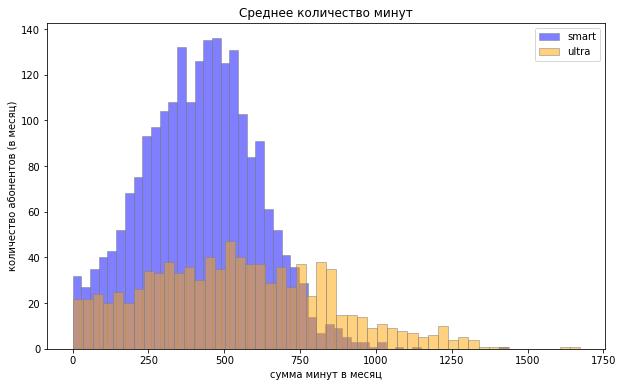

In [42]:
plt.figure(figsize=(10,6))
plt.hist(data_smart['duration_sum'],  bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
plt.hist(data_ultra['duration_sum'],  bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
plt.legend()
plt.title('Среднее количество минут')
plt.ylabel('количество абонентов (в месяц)')
plt.xlabel('сумма минут в месяц')
plt.show()

<AxesSubplot:title={'center':'Средняя длительность звонков в тарифе Smart'}, xlabel='month'>

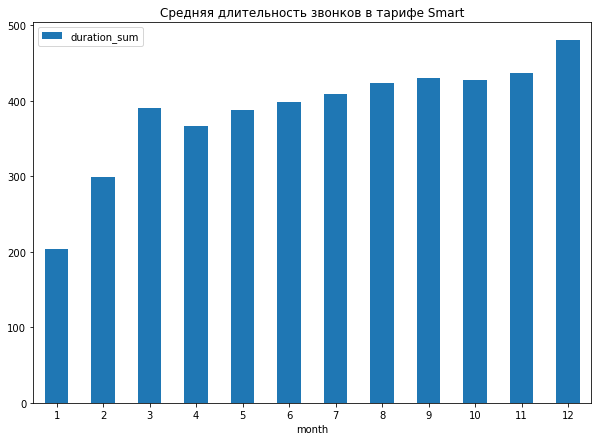

In [43]:
data_smart.pivot_table(index='month', values='duration_sum', aggfunc='mean').plot(y='duration_sum',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Средняя длительность звонков в тарифе Smart',
                                                                                  figsize=(10, 7))

<AxesSubplot:title={'center':'Средняя длительность звонков в тарифе Ultra'}, xlabel='month'>

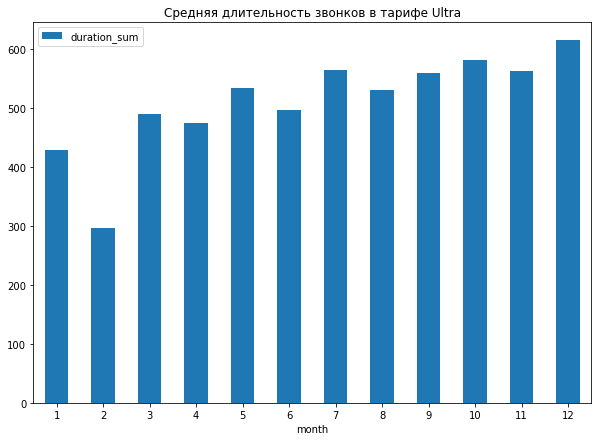

In [44]:
data_ultra.pivot_table(index='month', values='duration_sum', aggfunc='mean').plot(y='duration_sum',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Средняя длительность звонков в тарифе Ultra',
                                                                                  figsize=(10, 7))

#### Боксплоты для анализа длительности звонков

Построим боксплоты для статистического анализа имеющихся данных по кол-ву использованных минут в месяц для разных тарифов

[Text(0.5, 1.0, 'Распределение длительности звонков для разных тарифов')]

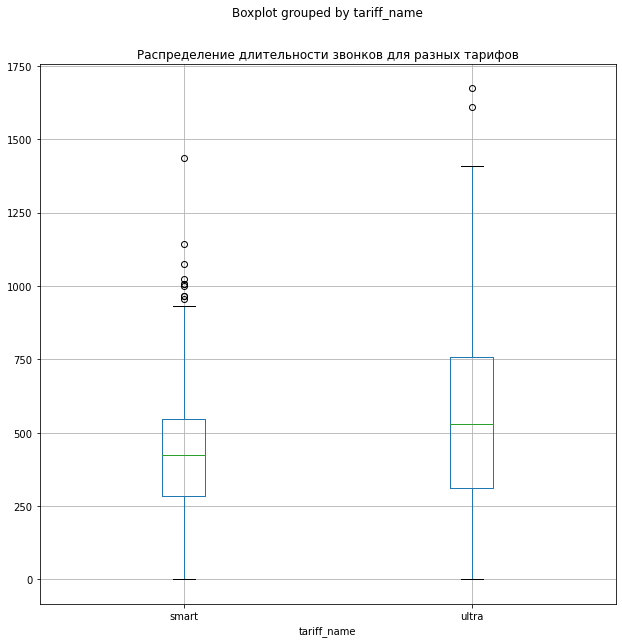

In [45]:
data.boxplot(column='duration_sum', by='tariff_name', figsize=(10, 10)).set(title='Распределение длительности звонков для разных тарифов',)

#### Статистические показатели длительности звонков

Посчитаем общие статистические показатели для обоих тарифов

In [46]:
print('Среднее требуемое кол-во минут пользователям тарифа Smart', data_smart.loc[data_smart['duration_sum'] != 0]['duration_sum'].mean())
print('Среднее требуемое кол-во минут пользователям тарифа Ultra', data_ultra.loc[data_ultra['duration_sum'] != 0]['duration_sum'].mean())
print('Дисперсия использованного кол-ва минут пользователями тарифа Smart', np.var(data_smart.loc[data_smart['duration_sum'] != 0]['duration_sum']))
print('Дисперсия использованного кол-ва минут пользователями тарифа Ultra', np.var(data_ultra.loc[data_ultra['duration_sum'] != 0]['duration_sum']))
print('Стандартное отклонение использованного кол-ва минут пользователями тарифа Smart', math.sqrt(np.var(data_smart.loc[data_smart['duration_sum'] != 0]['duration_sum'])))
print('Стандартное отклонение использованного кол-ва минут пользователями тарифа Ultra', math.sqrt(np.var(data_ultra.loc[data_ultra['duration_sum'] != 0]['duration_sum'])))

Среднее требуемое кол-во минут пользователям тарифа Smart 419.4403421882035
Среднее требуемое кол-во минут пользователям тарифа Ultra 547.7550158394931
Дисперсия использованного кол-ва минут пользователями тарифа Smart 35702.046530995045
Дисперсия использованного кол-ва минут пользователями тарифа Ultra 93239.86606512639
Стандартное отклонение использованного кол-ва минут пользователями тарифа Smart 188.94985189460996
Стандартное отклонение использованного кол-ва минут пользователями тарифа Ultra 305.3520362878335


### Анализ использования пакета сообщений

#### Гистограммы распределения кол-ва отправленных сообщений

Построим гистограммы и столбчатые диаграммы для визуализации распределения среднего кол-ва отправленных сообщений в месяц.

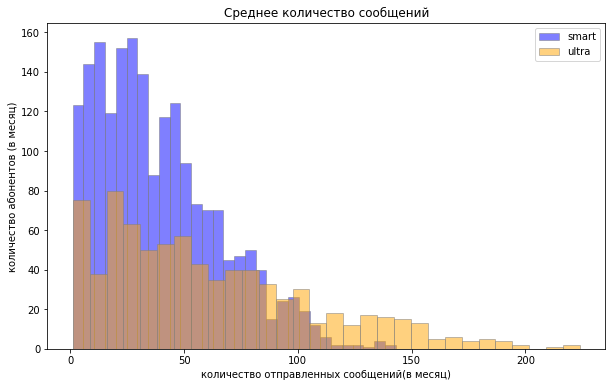

In [47]:
plt.figure(figsize=(10,6))
plt.hist(data_smart['messages_count'],  bins=30, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
plt.hist(data_ultra['messages_count'],  bins=30, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
plt.legend()
plt.title('Среднее количество сообщений')
plt.ylabel('количество абонентов (в месяц)')
plt.xlabel('количество отправленных сообщений(в месяц)')
plt.show()

<AxesSubplot:title={'center':'Среднее количество сообщений по месяцам в тарифе Smart'}, xlabel='month'>

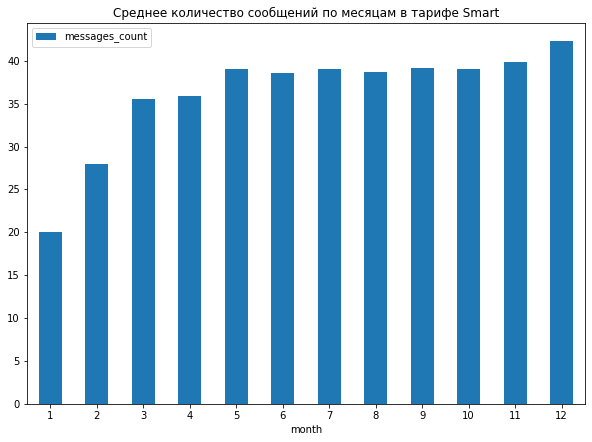

In [48]:
data_smart.pivot_table(index='month', values='messages_count', aggfunc='mean').plot(y='messages_count',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Среднее количество сообщений по месяцам в тарифе Smart',
                                                                                  figsize=(10, 7))

<AxesSubplot:title={'center':'Среднее количество сообщений по месяцам в тарифе Ultra'}, xlabel='month'>

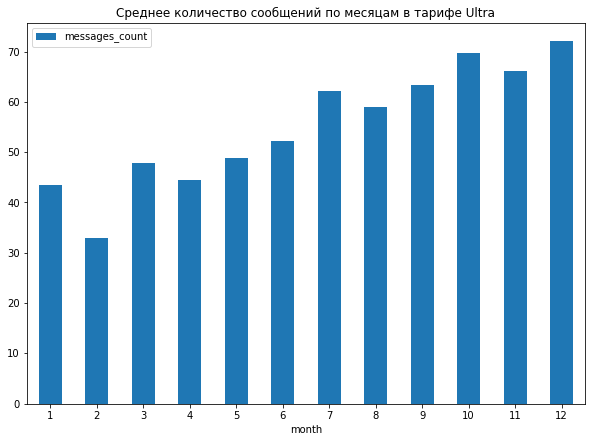

In [49]:
data_ultra.pivot_table(index='month', values='messages_count', aggfunc='mean').plot(y='messages_count',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Среднее количество сообщений по месяцам в тарифе Ultra',
                                                                                  figsize=(10, 7))

#### Боксплоты для анализа кол-ва отправленных сообщений

Построим боксплоты для статистического анализа имеющихся данных по кол-ву отправленных сообщений в месяц для разных тарифов

[Text(0.5, 1.0, 'Распределение количества сообщений для разных тарифов')]

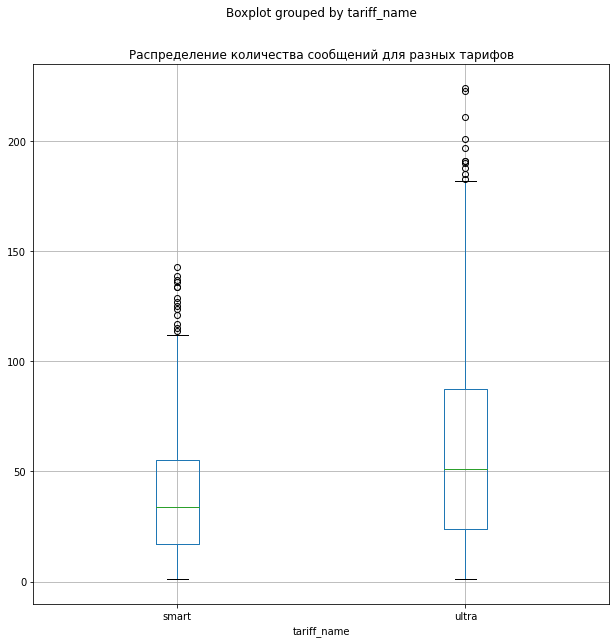

In [50]:
data.boxplot(column='messages_count', by='tariff_name', figsize=(10, 10)).set(title='Распределение количества сообщений для разных тарифов',)

#### Статистические показатели кол-ва отправленных сообщений

Посчитаем общие статистические показатели для обоих тарифов

In [51]:
print('Среднее требуемое кол-во сообщений пользователям тарифа Smart', data_smart.loc[data_smart['messages_count'] != 0]['messages_count'].mean())
print('Среднее требуемое кол-во сообщений пользователям тарифа Ultra', data_ultra.loc[data_ultra['messages_count'] != 0]['messages_count'].mean())
print('Дисперсия использованного кол-ва сообщений пользователями тарифа Smart', np.var(data_smart.loc[data_smart['messages_count'] != 0]['messages_count']))
print('Дисперсия использованного кол-ва сообщений пользователями тарифа Ultra', np.var(data_ultra.loc[data_ultra['messages_count'] != 0]['messages_count']))
print('Стандартное отклонение использованного кол-ва сообщений пользователями тарифа Smart', math.sqrt(np.var(data_smart.loc[data_smart['messages_count'] != 0]['messages_count'])))
print('Стандартное отклонение использованного кол-ва сообщений пользователями тарифа Ultra', math.sqrt(np.var(data_ultra.loc[data_ultra['messages_count'] != 0]['messages_count'])))

Среднее требуемое кол-во сообщений пользователям тарифа Smart 38.71644120707596
Среднее требуемое кол-во сообщений пользователям тарифа Ultra 61.161006289308176
Дисперсия использованного кол-ва сообщений пользователями тарифа Smart 717.220843110225
Дисперсия использованного кол-ва сообщений пользователями тарифа Ultra 2107.005523515689
Стандартное отклонение использованного кол-ва сообщений пользователями тарифа Smart 26.78097912904278
Стандартное отклонение использованного кол-ва сообщений пользователями тарифа Ultra 45.902129836377846


### Анализ использования пакета интернет трафика

#### Гистограммы использования интернет-трафика

Построим гистограммы и столбчатые диаграммы для визуализации распределения среднего объема использованного интернет-трафика в месяц.

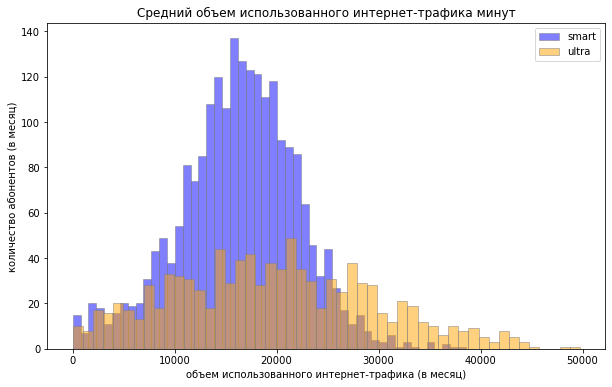

In [52]:
plt.figure(figsize=(10,6))
plt.hist(data_smart['sum_mb_used'],  bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
plt.hist(data_ultra['sum_mb_used'],  bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
plt.legend()
plt.title('Средний объем использованного интернет-трафика минут')
plt.ylabel('количество абонентов (в месяц)')
plt.xlabel('объем использованного интернет-трафика (в месяц)')
plt.show()

<AxesSubplot:title={'center':'Средний используемый объем интернет-траффика по месяцам в тарифе Smart'}, xlabel='month'>

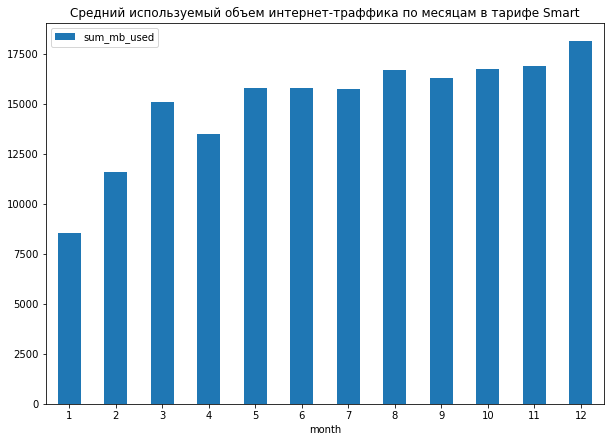

In [53]:
data_smart.pivot_table(index='month', values='sum_mb_used', aggfunc='mean').plot(y='sum_mb_used',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Средний используемый объем интернет-траффика по месяцам в тарифе Smart',
                                                                                  figsize=(10, 7))

<AxesSubplot:title={'center':'Средний используемый объем интернет-траффика по месяцам в тарифе Ultra'}, xlabel='month'>

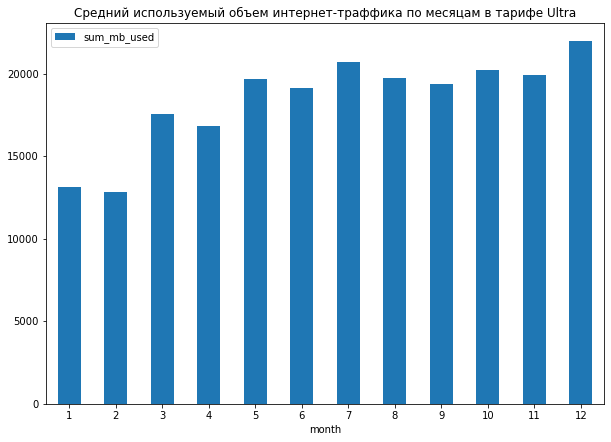

In [54]:
data_ultra.pivot_table(index='month', values='sum_mb_used', aggfunc='mean').plot(y='sum_mb_used',
                                                                                  kind='bar',
                                                                                  rot=0,
                                                                                  title='Средний используемый объем интернет-траффика по месяцам в тарифе Ultra',
                                                                                  figsize=(10, 7))

#### Боксплоты для анализа объема использованного интернет трафика

Построим боксплоты для статистического анализа имеющихся данных по объему использованного интернет-трафика в месяц для разных тарифов

[Text(0.5, 1.0, 'Распределение использования интернет трафика для разных тарифов')]

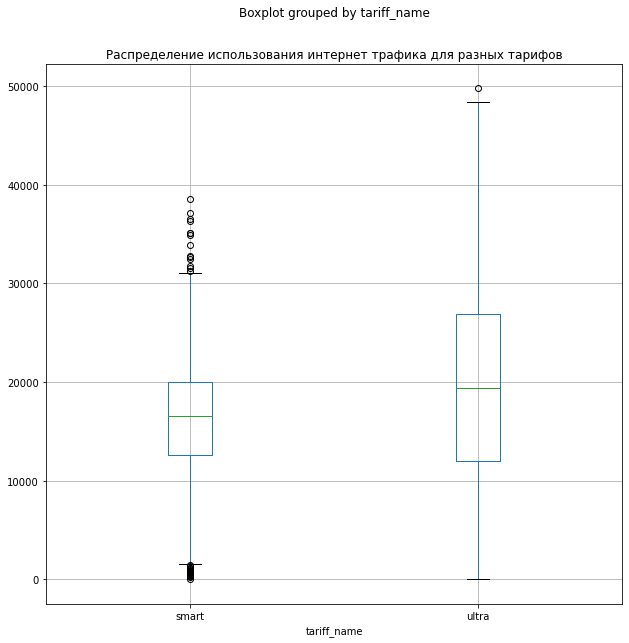

In [55]:
data.boxplot(column='sum_mb_used', by='tariff_name', figsize=(10, 10)).set(title='Распределение использования интернет трафика для разных тарифов',)

#### Статистические показатели объема использованного интернет-трафика

Посчитаем общие статистические показатели для обоих тарифов

In [56]:
print('Среднее требуемое кол-во объема интернет трафика пользователям тарифа Smart', data_smart.loc[data_smart['sum_mb_used'] != 0]['sum_mb_used'].mean())
print('Среднее требуемое кол-во объема интернет трафика пользователям тарифа Ultra', data_ultra.loc[data_ultra['sum_mb_used'] != 0]['sum_mb_used'].mean())
print('Дисперсия использованного кол-ва объема интернет трафика пользователями тарифа Smart', np.var(data_smart.loc[data_smart['sum_mb_used'] != 0]['sum_mb_used']))
print('Дисперсия использованного кол-ва объема интернет трафика пользователями тарифа Ultra', np.var(data_ultra.loc[data_ultra['sum_mb_used'] != 0]['sum_mb_used']))
print('Стандартное отклонение использованного кол-ва объема интернет трафика пользователями тарифа Smart', math.sqrt(np.var(data_smart.loc[data_smart['sum_mb_used'] != 0]['sum_mb_used'])))
print('Стандартное отклонение использованного кол-ва объема интернет трафика пользователями тарифа Ultra', math.sqrt(np.var(data_ultra.loc[data_ultra['sum_mb_used'] != 0]['sum_mb_used'])))

Среднее требуемое кол-во объема интернет трафика пользователям тарифа Smart 16223.430175123485
Среднее требуемое кол-во объема интернет трафика пользователям тарифа Ultra 19689.187885010266
Дисперсия использованного кол-ва объема интернет трафика пользователями тарифа Smart 34241878.25679938
Дисперсия использованного кол-ва объема интернет трафика пользователями тарифа Ultra 98466991.17722502
Стандартное отклонение использованного кол-ва объема интернет трафика пользователями тарифа Smart 5851.656026869606
Стандартное отклонение использованного кол-ва объема интернет трафика пользователями тарифа Ultra 9923.053520828405


### Выводы по результатам анализа

Изучив полученные данные можно сделать следующие выводы:

**Анализ длительности звонков**

- Чаще всего для тарифа Smart в месяц в среднем используется около 450 минут 
- Чаще всего для тарифа Ultra в месяц в среднем используется около 580 минут
- Медианное значение длительности звонока в тарифе Ultra больше, чем в тарифе Smart
- Межквартильное расстояние у тарифа Ultra также больше
- Минимумы у обоих тарифов равны, а вот максимум больше у тарифа Ultra 
- Среди данных по тарифу Smart гораздо чаще присутствуют выбросы
- Среднее использованное кол-во минут в тарифе Ultra больше, чем в тарифе Smart
- Дисперсия использованного кол-ва минут в тарифе Ultra в 3 раза больше, чем в тарифе Smart
- Стандартное отклонение использованного кол-ва минут в тарифе Ultra в 2 раза больше, чем в тарифе Smart

**Анализ количества сообщений**

- Чаще всего для тарифа Smart в месяц в среднем отправляется около 38 сообщений 
- Чаще всего для тарифа Ultra в месяц в среднем отправляется около от 45-55 до 60 и 70+ сообщений
- Медианное значение кол-во отправленных сообщений в тарифе Ultra больше, чем в тарифе Smart
- Межквартильное расстояние у тарифа Ultra также больше
- Минимумы у обоих тарифов равны, а вот максимум больше у тарифа Ultra 
- Среди данных по тарифу Smart гораздо чаще присутствуют выбросы
- Среднее кол-во отправленных сообщений в тарифе Ultra больше, чем в тарифе Smart
- Дисперсия кол-ва отправленных сообщений в тарифе Ultra в почти 3 раза больше, чем в тарифе Smart
- Стандартное отклонение кол-ва отправленных сообщений в тарифе Ultra в почти 2 раза больше, чем в тарифе Smart

**Анализ объема Интернет-траффика**

- Чаще всего для тарифа Smart в месяц в среднем используется около 15800-16600 мб
- Чаще всего для тарифа Ultra в месяц в среднем используется около 20000 мб
- Медианное значение кол-во отправленных сообщений в тарифе Ultra больше, чем в тарифе Smart
- Межквартильное расстояние у тарифа Ultra также больше
- Минимум у тарифа Smart больше, а вот максимум больше у тарифа Ultra 
- Среди данных по тарифу Smart гораздо чаще присутствуют выбросы
- Средний объем использованного интернет-трафика в тарифе Ultra больше, чем в тарифе Smart
- Дисперсия объема использованного интернет-трафика в тарифе Ultra в почти 3 раза больше, чем в тарифе Smart
- Стандартное отклонение объема использованного интернет-трафика в тарифе Ultra в почти 2 раза больше, чем в тарифе Smart


## Проверка гипотез

Поскольку мы проводим анализ лишь по небольшой выборке клиентов, а значит не имеем всей генеральной совокупности, то для проверки гипотез будем использовать t-тест.

### Проверка первой гипотезы

Гипотеза №1:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;


Для того, чтобы проверить данную гипотезу, определим составим списки с выручками пользователей каждого из тарифов

In [57]:
data_income_month_list_smart = data_smart['monthly_income'].values.tolist()

In [58]:
data_income_month_list_ultra = data_ultra['monthly_income'].values.tolist()

Сформулируем нулевую и альтернативую гипотезу:

- Нулевая гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» равны
- Альтернативная гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» не равны

Так, при невозможности отбросить нулевую гипотезу, наша Гипотеза №1 будет не подтверждена, а при отбрасывании нулевой гипотезы мы сможем утверждать о значимом различии между выручкой пользователей разных тарифов

Зададим уровень значимости в 1%

In [59]:
alpha = .01

In [60]:
results = st.ttest_ind(
    data_income_month_list_ultra,
    data_income_month_list_smart)

In [61]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Значение pvalue = 0 можно получить только когда данные очень сильно различаются. Нулевую гипотезу, гласящую о том, что средние выручки пользователей тарифов "Смарт" и "Ультра" равны, мы отбрасываем. Теперь можно утверждать, что между средними выручками клиентов рассматриваемых тарифов присутствует значительное различие

### Проверка второй гипотезы

Гипотеза №2:

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Сгруппируем записи нашего датасета в зависмости от города

In [62]:
data_msk = data.query('city == "Москва"')
data_not_msk = data.query('city != "Москва"')

Оценим размеры выборок

In [63]:
print(data_msk.shape[0])

611


In [64]:
print(data_not_msk.shape[0])

2603


Выборки большие, но сильно отличаются по размеру, также в Москве другой тип клиентов по уровню платежеспособности и потебностям в функционале тарифа, что тоже может сказаться на дисперсии выборки, понадобится параметр equal_var = False.

Сформулируем нулевую и альтернативую гипотезу:

- Нулевая гипотеза: средняя выручка пользователей из Москвы равна от выручке пользователей из других регионов
- Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна от выручке пользователей из других регионов

Так, при невозможности отбросить нулевую гипотезу, наша Гипотеза №2 будет не подтверждена, а при отбрасывании нулевой гипотезы мы сможем утверждать о значимом различии между выручкой пользователей из Москвы и других регионов.

In [65]:
data_income_msk_list = data_msk['monthly_income'].values.tolist()

In [66]:
data_income_not_msk_list = data_not_msk['monthly_income'].values.tolist()

In [67]:
results = st.ttest_ind(
    data_income_msk_list,
    data_income_not_msk_list, equal_var=False)

In [68]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отбросить не получилось, следовательно мы можем утверждать о том, что между средней выручкой клиентов из Москвы и клиентов из других городов нет значимых различий, а значит Гипотеза №2 не подтверждена.

### Сравнение тарифов

Тариф "Смарт"

In [69]:
np.mean(data_income_month_list_smart)

1289.9735307312696

In [70]:
np.var(data_income_month_list_smart)

669485.2209234245

In [71]:
math.sqrt(np.var(data_income_month_list_smart))

818.2207653949051

In [72]:
len(data_income_month_list_smart)

2229

In [73]:
np.sum(data_income_month_list_smart)

2875351.0

Тариф "Ультра"

In [74]:
np.mean(data_income_month_list_ultra)

2070.1522842639592

In [75]:
np.var(data_income_month_list_ultra)

141373.07325620347

In [76]:
math.sqrt(np.var(data_income_month_list_ultra))

375.9961080333192

In [77]:
len(data_income_month_list_ultra)

985

In [78]:
np.sum(data_income_month_list_ultra)

2039100.0

## Общий вывод

В ходе проведенного исследования были получены следующие выводы:

- Гипотеза о различии средней выручки клиентов тарифов "Смарт" и "Ультра" подтверждена
- Гипотеза о различии средней выручки клиентов из Москвы и других городов не подтверждена
* Среднее требуемое кол-во минут пользователям тарифа Smart: примерно 400 минут в месяц
* Среднее требуемое кол-во минут пользователям тарифа Ultra: примерно 580 минут в месяц
* Среднее требуемое кол-во сообщений пользователям тарифа Smart: примерно 39 штук в месяц
* Среднее требуемое кол-во сообщений пользователям тарифа Ultra: примерно 69 штук в месяц
* Средний требуемый объем интернет трафика пользователям тарифа Smart: примерно 16000 мб в месяц
* Средний требуемый объем интернет трафика пользователям тарифа Ultra: примерно 20000 мб в месяц
* При выборке в 2 раза меньшей, чем у тарифа "Смарт", тариф "Ультра" принес в сумме за 2018 год на 800000 рублей меньше, чем его конкурентный тариф. Можно было бы предположить, что увеличь выборку тарифа "Ультра" путем привлечения клиентов рекламой, то он одназначно будет лучше для компании, но учитывая величину дисперсии и стандартного отклонения тарифа "Смарт", более правильным решением будет выбрать именно его для продвижения рекламной компанией, клиенты чаще будут приносить компании Мегалайн денег значительно больше, чем приносили бы клиенты тарифа "Ультра"